# K-Means Clustering:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

### Finding closest centroids:

In [2]:
def findClosestCentroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    dist = np.zeros(k)
    
    for i in range(m):
        for j in range(k):
            dist[j] = np.sqrt(np.sum((X[i,:] - centroids[j,:]) ** 2))
        idx[i] = np.argmin(dist)
    
    return idx

In [3]:
# test the implementation of findClosestCentroids
data = loadmat('machine-learning-ex7/ex7/ex7data2.mat')
X = data['X']
initialCentroids = np.array([[3,3], [6,2], [8,5]])

idx = findClosestCentroids(X, initialCentroids)
idx[:3]

array([0., 2., 1.])

### Computing centroid means:

In [4]:
def computeCentroids(X, idx, k):
    n = X.shape[1]
    centroids = np.zeros((k,n))
    
    for i in range(k):
        centroids[i, :] = np.mean(X[np.where(idx == i), :], axis=1)
    
    return centroids

In [5]:
computeCentroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

### K-means on example dataset:

In [6]:
def runKmeans(X, centroids, max_iters):
    k = len(centroids)
    
    # run kmeans
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        
        centroids = computeCentroids(X, idx, k)
    
    return idx, centroids

In [7]:
max_iters = 10

idx, centroids = runKmeans(X, initialCentroids, max_iters)

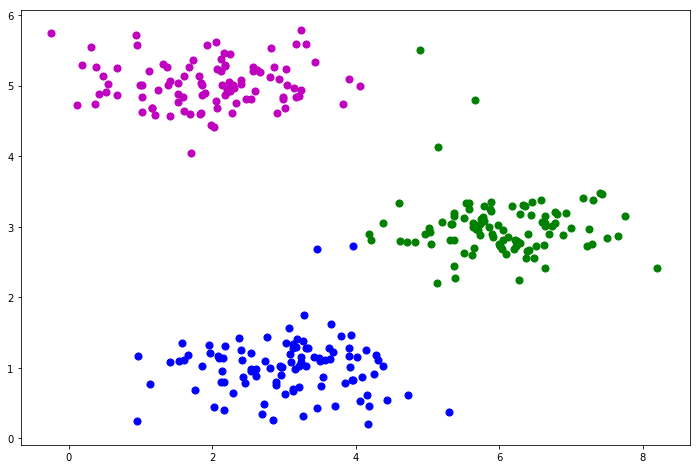

In [8]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=50, c='m')
ax.scatter(cluster2[:,0], cluster2[:,1], s=50, c='b')
ax.scatter(cluster3[:,0], cluster3[:,1], s=50, c='g')

### Random initialization:

In [9]:
def initCentroids(X, k):
    m = X.shape[0]
    
    randidx = np.random.randint(0, m, k)
    
    return X[randidx, :]

In [10]:
initCentroids(X, 3)

array([[3.17109619, 5.5946452 ],
       [3.30063655, 1.28107588],
       [2.37198785, 1.42789607]])

### Image compression with K-means:

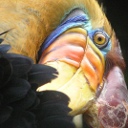

In [11]:
from IPython.display import Image
Image(filename='machine-learning-ex7/ex7/bird_small.png')

In [12]:
imageData = loadmat('machine-learning-ex7/ex7/bird_small.mat')
imageData

{'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
         [ 59,  43,  42]],
 
        [[ 15,  19,  19],
         [ 20,  20,  18],
         [ 18,  19,  17],
         ...,
         [ 65,  43,  39

In [13]:
A = imageData['A']
A.shape

(128, 128, 3)

In [14]:
# Divide by 255 so that all values are in the range 0 - 1
A = A / 255

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [15]:
# Reduce the no. of colors to 16
k = 16

# randomly initialize the centroids
initialCentroids = initCentroids(X, k)

# run the kmeans algorithm
idx, centroids = runKmeans(X, initialCentroids, 10)

# get the centroids(colors) for every pixel
idx = findClosestCentroids(X, centroids)

# map each pixel to it's centroid values
X_comp = centroids[idx.astype(int), :]
X_comp.shape

(16384, 3)

In [16]:
# reshape to original dimensions
X_comp = np.reshape(X_comp, A.shape)
X_comp.shape

(128, 128, 3)

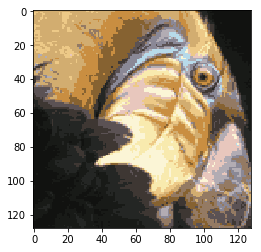

In [17]:
plt.imshow(X_comp)

# Principal component analysis:

### Example Dataset:

In [18]:
data = loadmat('machine-learning-ex7/ex7/ex7data1.mat')
data

{'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
        [3.22382902, 4.94255585],
        [4.92948801, 5.95501971],
        [5.79295774, 5.10839305],
        [2.81684824, 4.81895769],
        [

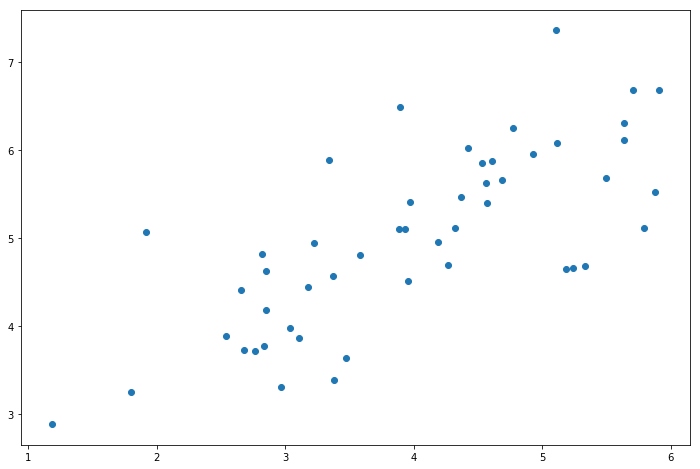

In [19]:
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])

### Implementing PCA:

In [20]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

In [21]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

## Dimensionality Reduction with PCA:
### Projecting the data onto the principal components:

In [27]:
def projectData(X, U, k):
    U_reduced = U[:, :k]
    return np.dot(X, U_reduced)

In [28]:
Z = projectData(X, U, 1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

### Reconstructing an approximation of the data:

In [29]:
def recoverData(Z, U, k):
    U_reduced = U[:, :k]
    return np.dot(Z, U_reduced.T)

In [30]:
X_recovered = recoverData(Z, U, 1)
X_recovered.shape, X_recovered

((50, 2), matrix([[3.76152442, 2.89550838],
         [5.67283275, 4.36677606],
         [3.80014373, 2.92523637],
         [3.53223661, 2.71900952],
         [3.80569251, 2.92950765],
         [5.57926356, 4.29474931],
         [3.93851354, 3.03174929],
         [6.94105849, 5.3430181 ],
         [4.93142811, 3.79606507],
         [5.58255993, 4.29728676],
         [5.48117436, 4.21924319],
         [5.38482148, 4.14507365],
         [5.02696267, 3.8696047 ],
         [5.54606249, 4.26919213],
         [3.60199795, 2.77270971],
         [6.58954104, 5.07243054],
         [5.681006  , 4.37306758],
         [4.02614513, 3.09920545],
         [6.76785875, 5.20969415],
         [5.50019161, 4.2338821 ],
         [6.81311151, 5.24452836],
         [4.56923815, 3.51726213],
         [6.49947125, 5.00309752],
         [4.94381398, 3.80559934],
         [3.47034372, 2.67136624],
         [4.41334883, 3.39726321],
         [5.97375815, 4.59841938],
         [6.10672889, 4.70077626],
         [4

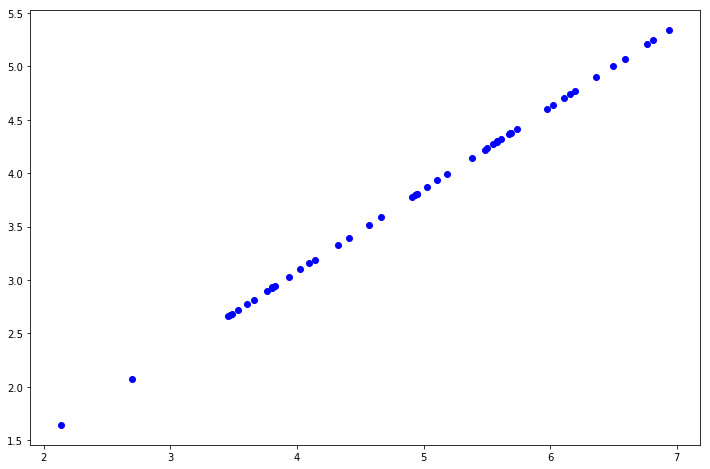

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X_recovered[:, 0], X_recovered[:, 1], 'bo')

# Face Image Dataset:
### PCA on Faces:

In [52]:
faces = loadmat('machine-learning-ex7/ex7/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

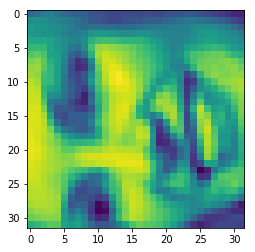

In [60]:
face = np.reshape(X[4000,:], (32, 32))
plt.imshow(face)

### Dimensionality Reduction:

In [61]:
U, S, V = pca(X)

# reduce to 100 principal components
k = 100
Z = projectData(X, U, k)

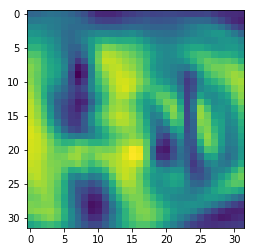

In [62]:
X_recovered = recoverData(Z, U, k)
face = np.reshape(X_recovered[4000,:], (32, 32))
plt.imshow(face)